### Домашнее задание

Загрузите [данные](https://www.dropbox.com/s/3t1moa1wpflx2u9/california.dat?dl=0).

**Задание 1:** Найти оптимальную глубину дерева.<br/>
Разделите выборку на train-test в пропорции 70/30.<br/>
Обучите деревья с глубиной от `1` до `30`. Для каждой глубины расчитайте среднюю квадратичную ошибку на train и на test<br/>
Изобразите эти ошибки на одном графике, сделайте вывод по поводу оптимальной глубины дерева.

In [9]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
df = pd.read_csv('california.dat')
df.head()

,Longitude,Latitude,HousingMedianAge,TotalRooms,TotalBedrooms,Population,Households,MedianIncome,MedianHouseValue
0,-117.03,32.78,17,5481,1618,2957,1537,2.5707,171300
1,-118.23,33.80,26,239,135,165,112,1.3333,187500
2,-122.46,37.71,39,2076,482,1738,445,3.1958,232100
3,-122.06,37.94,19,4005,972,1896,893,2.5268,235700
4,-122.87,38.68,32,4073,718,2053,629,3.7352,228000


In [11]:
features = df.drop(['MedianHouseValue'], axis = 1)
from sklearn.cross_validation import train_test_split # разобъём выборку на тестовую и обучающую
X_train, X_test, y_train, y_test = train_test_split(features, df.MedianHouseValue,  test_size = 0.3, train_size = 0.7)

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn import tree
MSE_test = [] #список со значениями ошибок для тестовой выборки
MSE_train = []#список со значениями ошибок для обучающей выборки
depth = 30
for i in range(1, depth+1):
    clf = tree.DecisionTreeRegressor(max_depth=i)
    clf = clf.fit(X_train, y_train)
    test_predict = clf.predict(X_test)
    train_predict = clf.predict(X_train)
    error_test = sklearn.metrics.mean_squared_error(y_test, test_predict)
    error_train = sklearn.metrics.mean_squared_error(y_train, train_predict)
    MSE_test.append(error_test)
    MSE_train.append(error_train)

In [13]:
d = {'MSE_test': MSE_test, 'MSE_train': MSE_train}
Table = pd.DataFrame(data=d, index=range(1,31))
Table.index.name = 'Depth'
Table

,MSE_test,MSE_train
Depth,,
1,9.345338e+09,9.121413e+09
2,7.563040e+09,7.288775e+09
3,6.977991e+09,6.637015e+09
4,6.106814e+09,5.849516e+09
5,5.575905e+09,5.254570e+09
6,5.152803e+09,4.617202e+09
7,4.844762e+09,4.104751e+09
8,4.639273e+09,3.571764e+09
9,4.540021e+09,2.993068e+09


In [14]:
print(Table.sort_values('MSE_test').head(5)) #здесь выведено по 5 наименьших ошибок для каждой из выборок при разных глубинах
print('----------------------------------')
print(Table.sort_values('MSE_train').head(5))

           MSE_test     MSE_train
Depth                            
9      4.540021e+09  2.993068e+09
11     4.564327e+09  1.936089e+09
10     4.592799e+09  2.476913e+09
8      4.639273e+09  3.571764e+09
12     4.720347e+09  1.523034e+09
----------------------------------
           MSE_test     MSE_train
Depth                            
30     5.554719e+09  1.080490e+05
29     5.409986e+09  2.825700e+05
28     5.451995e+09  8.316651e+05
27     5.471908e+09  1.975402e+06
26     5.424286e+09  4.951589e+06


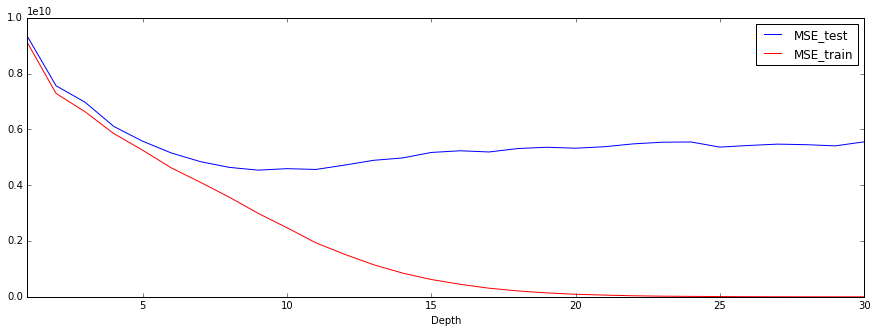

In [15]:
Table.plot(figsize=(15,5), color = ['b', 'r'])

Исходя из построений на графике и из выведенных таблиц видно, что наименьшие ошибки для тестовой выборки наблюдаются где-то при глубине дерева 8-12, сортировка говорит нам, что оптимальная глубина - 9, а для обучающей - 30, что видно как по сортировке значений выведенной таблицы, так и по графику (здесь всё логично, потому что с увеличением глубины на обучающей выборке должна увеличиваться точность предсказания. 

**Задание 2:** Выведите важности признаков. Для этого воспользуйтесь `DecisionTreeRegressor.feature_importances_`

In [16]:
feat = X_train.keys()
d1 = {'Важность признаков':clf.feature_importances_}
Table1 = pd.DataFrame(data=d1, index = feat ).sort_values('Важность признаков', ascending=False)
Table1.index.name = 'Признаки'
Table1

,Важность признаков
Признаки,
MedianIncome,0.512537
Longitude,0.152239
Latitude,0.144018
HousingMedianAge,0.065576
Population,0.041837
TotalBedrooms,0.037429
TotalRooms,0.024353
Households,0.022011


**Задание 3:** Поразмышляйте на темы:
* Обработки пропусков в данных.
* Как сделать разделяющие плоскости непараллельные осям?

#### 1) Обработки пропусков данных:<br/><br/>
* пропущенные данные можно просто удалить, однако такой метод не подходит для небольших датасетов, поскольку данные при маленькой выборке для нас слишком ценны, чтобы их удалять. В большой же выборке и при небольшом количестве пропусков мы можем полностью удалить объекты с признаками, где есть пропуски, это несильно скажется на точности предсказания метода. Удаление данных можно произвести, например, с помощью метода dropna. С помощью этого метода мы можем как удалить строки со всеми пропущенными данными, так и те, где есть хотя бы один пропуск.<br/><br/>
* при меньшей величине выборки и при особой ценности данных для нас, можно заменить пропущенные данные на среднее, медиану, моду (используется с категориальными признаками), другие статистические характеристики или же на любые интересующие нас числа или какие-то известные нам из других источников значения, близкие к истине. Заполнение пропущенных данных можно осуществить, например, с помощью методов fillna и interpolate.
<br/><br/>
* есть ещё сложный метод, когда мы используем алгоритмы обучения, чтобы на основании имеющихся данных по другим комбинациям значений признаков объектов машина научилась определять, какое значение должно находиться на местах пропусков при заданном наборе непропущенных значений.<br/><br/>
* можно также просто игнорировать пропуски данных, если их не слишком много и нам нужно, к примеру, просто построить какие-то графики (однако с вычислениями так скорее всего не получится и программа будет выдавать ошибки) <br/><br/>
Источник:
http://pandas.pydata.org/pandas-docs/stable/missing_data.html 
#### 2) Разделяющие плоскости, параллельные осям:<br/><br/>
В узлах дерева решений могут применяться следующие виды разделяющих критериев:<br/><br/>
* Решающиий пень: $$C_1(x,\tau) = [x \leq \tau]$$
* Линейный (ориентированный) критерий: $$C_2(x,w,\tau) = [xw \leq \tau]$$
* Нелинейный критерий второго порядка: $$C_3(x,w,W,\tau) = [xWx^T+xw \leq \tau]$$
* Более сложные разделяющие критерии <br/><br/>
Здесь $\tau$ - это пороговое (критическое) значение, w - вектор весов признаков в линейной комбинации, W - матрица из векторов весов признаков, х - объект.<br/><br/>
Проблему представляет собой "решающий пень", который проводит гиперплоскость параллельно осям, из-за чего деревья получаются большей высоты и их нужно много, чтобы получить точный результат.<br/><br/>
Чтобы решить эту проблему нужно тестировать в каждом узле более одного признака, а каждый признак, в свою очередь, должен тестироваться не один раз, что определённо также повысит точность предсказания. Таким образом в каждом узле дерева будет тестироваться какое-то условие по сумме признаков (возможно, ещё и домноженных на их веса), т.е. больше или меньше сумма значений признаков какого-то критического значения. В данном случае разделяющая гипералоскость не будет параллельна осям.<br/>
Источники:http://www.machinelearning.ru/wiki/images/d/d8/2015_517_RyzhkovAM.pdf<br/>
http://www.site.uottawa.ca/~stan/csi5387/multiv-DTs-Brodley.pdf
              